# regression (autompg dataset)_car name 사용O

## 0. 데이터 전처리

### 0.1 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv('auto-mpg.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
data = data[data.horsepower!='?']
data = data.astype({'horsepower':'int64'})

'?'로 채워져있는 행 제거

In [5]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [7]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [8]:
data['car name'].value_counts()

ford pinto                 5
toyota corolla             5
amc matador                5
amc gremlin                4
chevrolet impala           4
                          ..
plymouth sapporo           1
pontiac lemans v6          1
dodge aries wagon (sw)     1
volkswagen super beetle    1
buick century special      1
Name: car name, Length: 301, dtype: int64

In [9]:
data['car name']=[i[0] for i in data['car name'].str.split(' ')]

In [10]:
data['car name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [11]:
data['car name']=data['car name'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data['car name']=data['car name'].replace(['volkswagen','vw','vokswagen'],'volkswagen')
data['car name']=data['car name'].replace('maxda','mazda')
data['car name']=data['car name'].replace('toyouta','toyota')
data['car name']=data['car name'].replace('mercedes','mercedes-benz')
data['car name']=data['car name'].replace('nissan','datsun')
data['car name']=data['car name'].replace('capri','ford')

In [12]:
data['car name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'mercedes-benz', 'cadillac', 'triumph'], dtype=object)

In [13]:
data['car name'].value_counts(normalize=True)

ford             0.125000
chevrolet        0.119898
plymouth         0.079082
dodge            0.071429
amc              0.068878
toyota           0.066327
datsun           0.061224
volkswagen       0.056122
buick            0.043367
pontiac          0.040816
honda            0.033163
mazda            0.030612
mercury          0.028061
oldsmobile       0.025510
fiat             0.020408
peugeot          0.020408
audi             0.017857
chrysler         0.015306
volvo            0.015306
subaru           0.010204
opel             0.010204
saab             0.010204
mercedes-benz    0.007653
renault          0.007653
cadillac         0.005102
bmw              0.005102
hi               0.002551
triumph          0.002551
Name: car name, dtype: float64

In [14]:
len(data['car name'])

392

In [15]:
data = data.rename({'car name':'brand'}, axis = 1)

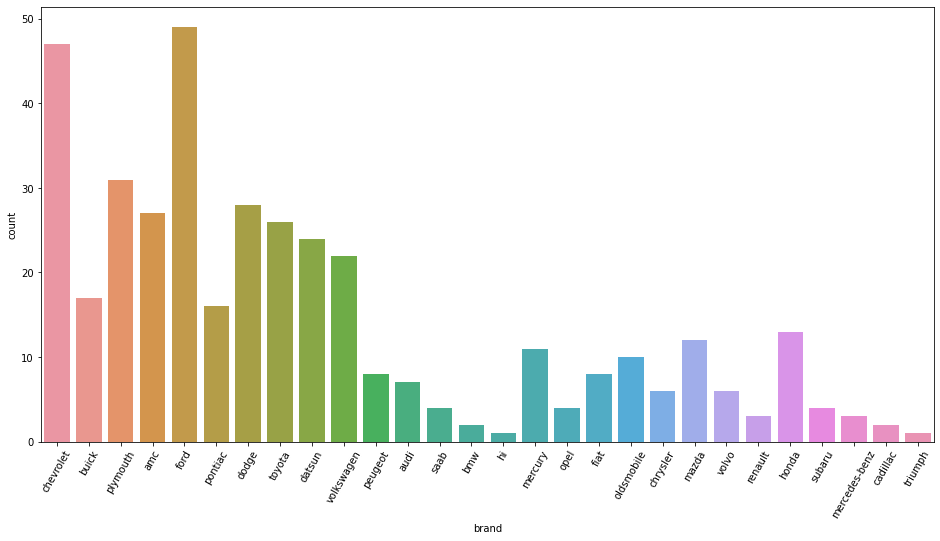

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data['brand'])
plt.xticks(rotation=60)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

data = pd.concat([data,pd.get_dummies(data['origin'], prefix = 'origin')], axis = 1)
data.drop('origin', axis = 1,inplace = True)

data = pd.concat([data,pd.get_dummies(data['brand'], prefix = 'car')], axis = 1)
data.drop('brand',axis = 1,inplace = True)

'''
data = pd.concat([data,pd.get_dummies(data['cylinders'], prefix = 'cylinders')], axis = 1)
data.drop('cylinders', axis = 1, inplace = True)

data = pd.concat([data,pd.get_dummies(data['model year'], prefix = 'year')],axis=1)
data.drop('model year', axis = 1, inplace = True)
'''

"\ndata = pd.concat([data,pd.get_dummies(data['cylinders'], prefix = 'cylinders')], axis = 1)\ndata.drop('cylinders', axis = 1, inplace = True)\n\ndata = pd.concat([data,pd.get_dummies(data['model year'], prefix = 'year')],axis=1)\ndata.drop('model year', axis = 1, inplace = True)\n"

In [18]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,...,car_peugeot,car_plymouth,car_pontiac,car_renault,car_saab,car_subaru,car_toyota,car_triumph,car_volkswagen,car_volvo
0,18.0,8,307.0,130,3504,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,1,0,...,0,0,0,0,0,0,0,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#data[['displacement','horsepower','weight','acceleration']] = StandardScaler().fit_transform(data[['displacement','horsepower','weight','acceleration']])

In [20]:
data.shape

(392, 38)

In [21]:
from sklearn.model_selection import train_test_split

y = data.pop('mpg')
X = data

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: mpg, dtype: float64

## 1. Linear Regression

### 1.1 modeling

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# b0값
lr.intercept_

-12.871022895538818

In [24]:
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {lr.coef_[idx]}")

The coefficient for cylinders is -0.6067769758752045
The coefficient for displacement is 0.021664137089660526
The coefficient for horsepower is -0.01846234791368131
The coefficient for weight is -0.006399075075607617
The coefficient for acceleration is 0.0760478894717978
The coefficient for model year is 0.73526323604985
The coefficient for origin_1 is -1.0762653964601963
The coefficient for origin_2 is 0.7375893756566702
The coefficient for origin_3 is 0.3386760208035155
The coefficient for car_amc is -1.8030900050428027
The coefficient for car_audi is -0.24576391275578405
The coefficient for car_bmw is -1.7895565658291634
The coefficient for car_buick is -1.0120949113171105
The coefficient for car_cadillac is 2.074213476951964
The coefficient for car_chevrolet is -0.7747793679847196
The coefficient for car_chrysler is -1.6929468319614343
The coefficient for car_datsun is 1.8645769744243033
The coefficient for car_dodge is 0.3405046089383428
The coefficient for car_fiat is 2.426601389

In [25]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)
mean_squared_error(y_pred, y_test)

10.706347806637247

In [26]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8277484744162067

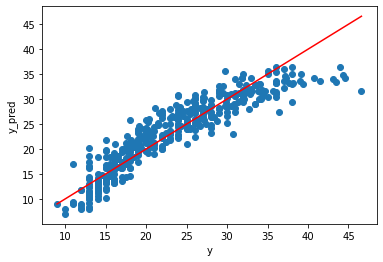

In [27]:
# 실측치y와 예측치y의 관계성 #

y_pred_new = lr.predict(X)
plt.scatter(y, y_pred_new)
line = np.linspace(min(y.values), max(y.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 다중공선성

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\yebin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [29]:
data.corr()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3,car_amc,...,car_peugeot,car_plymouth,car_pontiac,car_renault,car_saab,car_subaru,car_toyota,car_triumph,car_volkswagen,car_volvo
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,0.610494,-0.352324,-0.404209,0.155260,...,-0.103528,0.090833,0.094213,-0.075876,-0.087727,-0.087727,-0.194182,-0.043695,-0.210684,-0.058933
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,0.655936,-0.371633,-0.440825,0.154687,...,-0.096900,0.079435,0.174116,-0.086055,-0.075451,-0.091967,-0.211056,-0.035040,-0.231841,-0.072665
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.489625,-0.284948,-0.321936,0.072408,...,-0.061837,0.052979,0.174228,-0.078743,0.011306,-0.081798,-0.142187,-0.021666,-0.255838,-0.000982
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,0.600978,-0.293841,-0.447929,0.100080,...,-0.000823,0.083383,0.164802,-0.093747,-0.042171,-0.099472,-0.210048,-0.028471,-0.267830,0.008095
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,-0.258224,0.208298,0.115020,-0.046488,...,0.209993,-0.073353,-0.109312,0.056053,-0.013499,0.050988,0.048089,-0.008100,0.164892,0.001147
model year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.136065,-0.037745,0.199841,-0.146345,...,-0.028624,-0.070318,-0.026891,-0.023383,-0.054633,0.055760,0.026556,0.055265,0.049556,-0.004956
origin_1,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,1.000000,-0.591434,-0.648583,0.210674,...,-0.186339,0.226988,0.159787,-0.113373,-0.131081,-0.131081,-0.344089,-0.065288,-0.314800,-0.160956
origin_2,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,-0.591434,1.000000,-0.230157,-0.124600,...,0.315063,-0.134248,-0.094504,0.191692,0.221632,-0.046515,-0.122103,0.110390,0.532266,0.272145
origin_3,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.648583,-0.230157,1.000000,-0.136640,...,-0.072514,-0.147221,-0.103635,-0.044119,-0.051010,0.202103,0.530524,-0.025407,-0.122504,-0.062636
car_amc,0.155260,0.154687,0.072408,0.100080,-0.046488,-0.146345,0.210674,-0.124600,-0.136640,1.000000,...,-0.039257,-0.079701,-0.056105,-0.023885,-0.027615,-0.027615,-0.072491,-0.013755,-0.066320,-0.033909
